In [169]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
import numpy as np

In [170]:
df = pd.read_csv('../data/lab02/train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


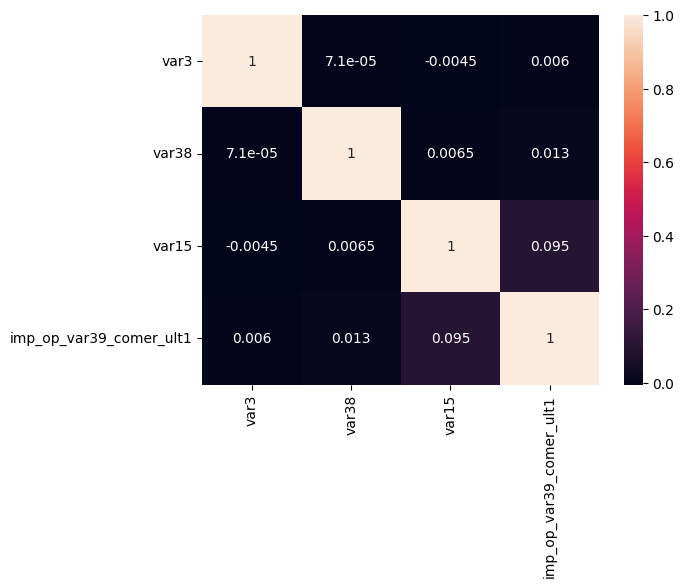

In [171]:
vars = ["var3", "var38", "var15", "imp_op_var39_comer_ult1"]
corr = df[vars].corr()
sns.heatmap(corr, annot=True)
plt.show()

The data doesn't seem linear at all. It barely has any correlation

In [172]:
nullcount = df.isnull().sum()
nullcount[nullcount > 0]

Series([], dtype: int64)

No null values

[0 1]


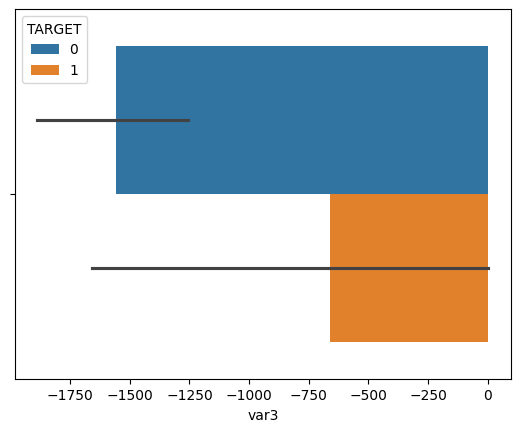

In [173]:
print(df['TARGET'].unique())

# exploring var3 wrt to target
sns.barplot(df, x='var3', hue='TARGET')
plt.show()

Very less var3 values for TARGET = 1

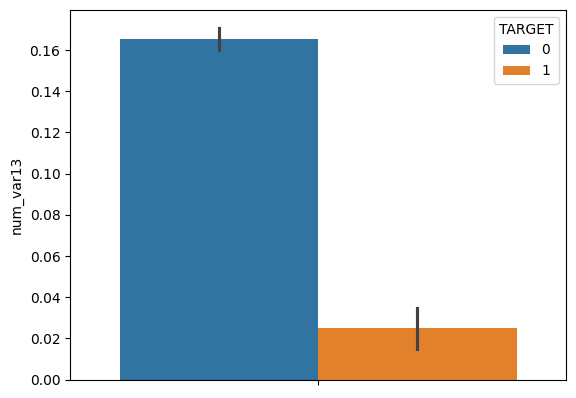

In [174]:
# imp_op_var41_ult1
# imp_op_var_39_comer_ult1

# exploring num_var13 wrt to target
sns.barplot(df, y='num_var13', hue='TARGET')
plt.show()

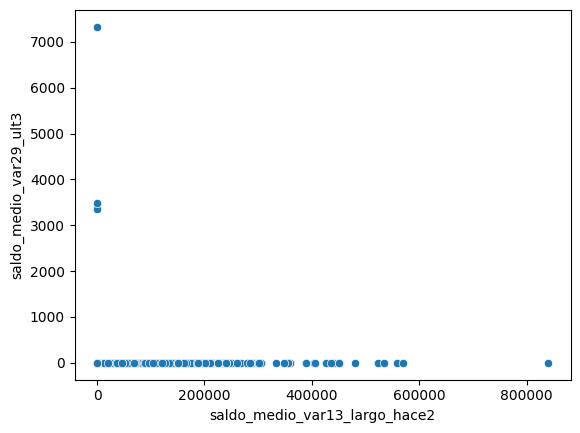

In [175]:
sns.scatterplot(df, x='saldo_medio_var13_largo_hace2', y='saldo_medio_var29_ult3')
plt.show()

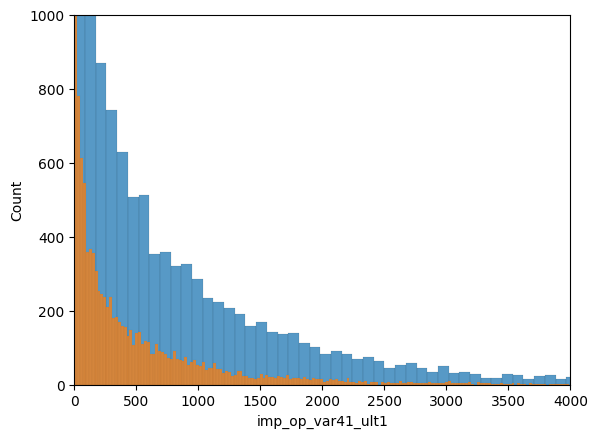

In [176]:

sns.histplot(df, x='imp_op_var41_ult1')
sns.histplot(df, x='imp_op_var39_comer_ult1')
plt.ylim(top=1000)
plt.xlim(left=0, right=4000)
plt.show()

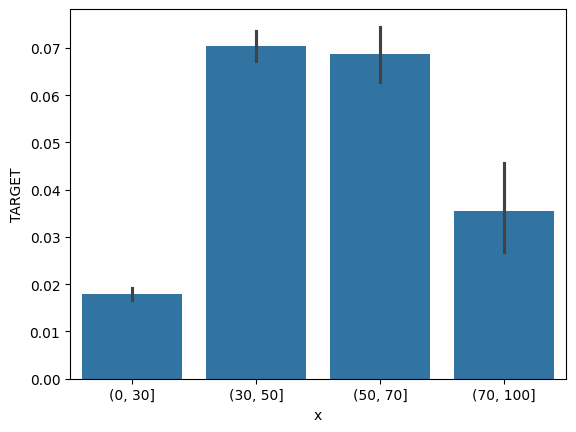

In [177]:
temp_df = df.copy()

temp_df['x'] = pd.cut(temp_df['var15'], bins=[0,30,50,70,100])
sns.barplot(data=temp_df, x='x', y='TARGET')
plt.show()

In [178]:
df.TARGET.value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

target variable is imbalanced

In [179]:
major_df = df[df.TARGET == 0]

df = pd.concat([
  major_df,
  resample(
    df[df.TARGET == 1],
    replace=True,
    n_samples=len(major_df),
    random_state=727
  )
])

df.TARGET.value_counts()

TARGET
0    73012
1    73012
Name: count, dtype: int64

In [180]:
abs_corr = df.corr(numeric_only=True).abs()

upper = abs_corr.where(
  np.triu(np.ones(abs_corr.shape), k=1).astype(bool)
)

to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

df = df.drop(columns=to_drop)

In [184]:
df_copy = df.copy()

X = df_copy.drop('TARGET', axis=1)
y = df_copy['TARGET']

selector = SelectKBest(k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(selected_features.tolist())

df_other_selected = df_copy[selected_features]

['var15', 'ind_var5', 'ind_var12_0', 'ind_var13_0', 'ind_var39_0']


c:\Users\Dell\Desktop\sem-repos\mlFall25\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 11  12  27  28  29  30  37  38  39  45  46  47  48  50  51  52  59  60
  62  64  74  75  83  85  88  90  94  95 104 105 109 110 111 118] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Dell\Desktop\sem-repos\mlFall25\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
